In [0]:
import pandas as pd
notas = pd.read_csv("ratings.csv")

#Analisando notas em geral

In [33]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [34]:
notas.shape

(100836, 4)

In [35]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [36]:
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [37]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [38]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [39]:
print("Media:",notas['nota'].mean())
print("Mediana:",notas.nota.median())

Media: 3.501556983616962
Mediana: 3.5


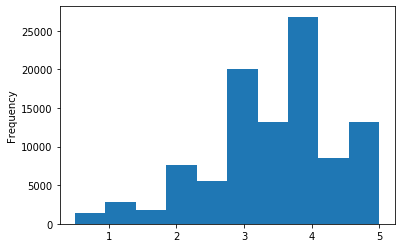

In [40]:
notas.nota.plot(kind='hist')

In [41]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

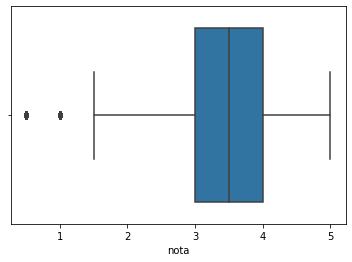

In [42]:
import seaborn as sns
sns.boxplot(notas.nota)

#Olhando filmes!

In [43]:
filmes = pd.read_csv("movies.csv")
filmes.columns = ["filmeId","titulo","genero"]
filmes.head()

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


#Analisando notas por filme

In [44]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

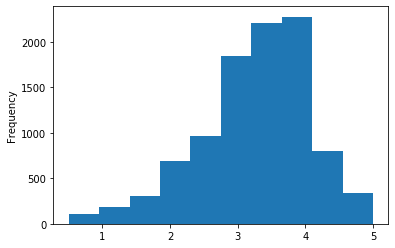

In [45]:
medias_por_filme = notas.groupby("filmeId").mean().nota
medias_por_filme.plot(kind="hist")

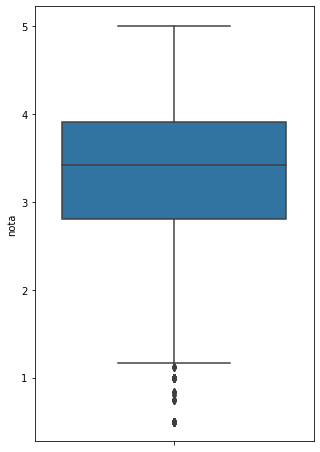

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [47]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

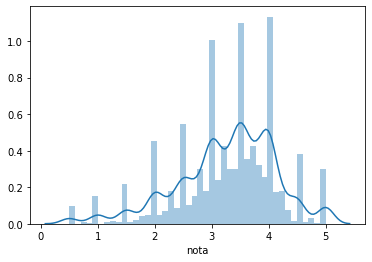

In [48]:
sns.distplot(medias_por_filme)

Text(0, 0.5, 'Usuários')

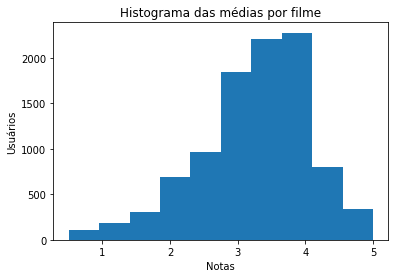

In [49]:
#import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias por filme")
plt.xlabel('Notas')
plt.ylabel('Usuários')

#Analisando um novo dataset

In [50]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [51]:
tmdb.original_language.unique()   #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [52]:
tmdb["original_language"].value_counts() #serie

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ru      11
ko      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
ro       2
cs       2
ar       2
id       2
ta       2
nb       1
ky       1
vi       1
ps       1
hu       1
te       1
tr       1
af       1
no       1
is       1
xx       1
sl       1
el       1
pl       1
Name: original_language, dtype: int64

In [53]:
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ru', 'ko', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ro', 'cs', 'ar', 'id', 'ta', 'nb',
       'ky', 'vi', 'ps', 'hu', 'te', 'tr', 'af', 'no', 'is', 'xx', 'sl', 'el',
       'pl'],
      dtype='object')

In [54]:
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [55]:
tmdb["original_language"].value_counts().to_frame()
#transformando uma serie em dataframe

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ru,11


In [56]:
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()
#transformando o índice em coluna
contagem_de_lingua.columns = ["original_language", "total"]
print(contagem_de_lingua)

   original_language  total
0                 en   4505
1                 fr     70
2                 es     32
3                 de     27
4                 zh     27
5                 hi     19
6                 ja     16
7                 it     14
8                 cn     12
9                 ru     11
10                ko     11
11                pt      9
12                da      7
13                sv      5
14                fa      4
15                nl      4
16                th      3
17                he      3
18                ro      2
19                cs      2
20                ar      2
21                id      2
22                ta      2
23                nb      1
24                ky      1
25                vi      1
26                ps      1
27                hu      1
28                te      1
29                tr      1
30                af      1
31                no      1
32                is      1
33                xx      1
34                sl

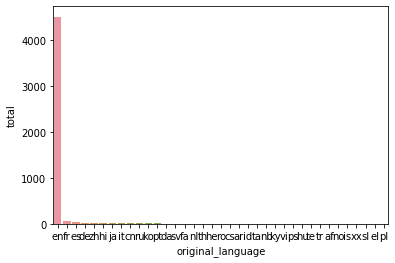

In [57]:
sns.barplot(x="original_language",y="total",data = contagem_de_lingua)

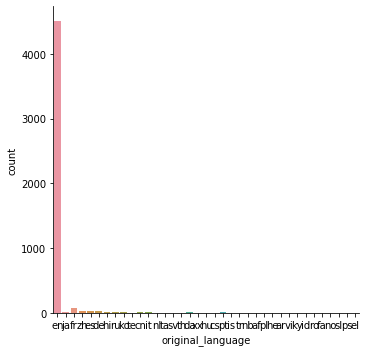

In [58]:
sns.catplot(x="original_language",kind="count", data=tmdb)

In [59]:
sns.__version__

'0.10.0'

([<matplotlib.patches.Wedge at 0x7fc6806eb6a0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

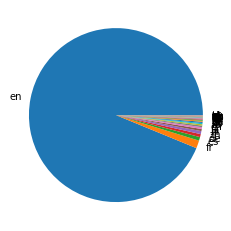

In [60]:
plt.pie(contagem_de_lingua["total"],labels=contagem_de_lingua["original_language"])

#Vamos comparar o inglês com outras línguas

In [61]:
total_por_lingua = tmdb["original_language"].value_counts()
total_geral=total_por_lingua.sum()
total_ingles=total_por_lingua.loc["en"]
total_resto = total_geral - total_ingles
print(total_ingles, total_resto)

4505 298


,lingua,total
0,ingles,4505
1,outros,298


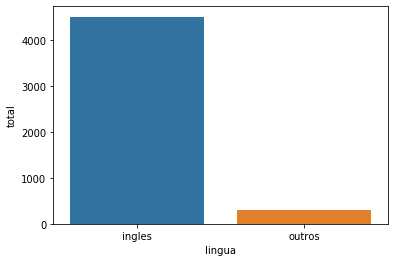

In [62]:
#criando um dataframe
dados = {
    'lingua' : ['ingles', 'outros'],
    'total' : [total_ingles,total_resto]
}
dados = pd.DataFrame(dados)
sns.barplot(x='lingua', y='total', data = dados)
dados

([<matplotlib.patches.Wedge at 0x7fc68058ccf8>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

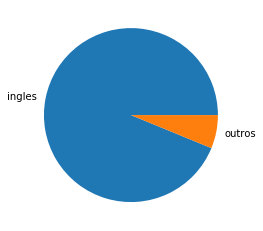

In [63]:
plt.pie(dados["total"],labels=dados["lingua"])

In [64]:
total_por_lingua_outros = tmdb.query("original_language!='en'").original_language.value_counts()
total_por_lingua_outros

fr    70
es    32
de    27
zh    27
hi    19
ja    16
it    14
cn    12
ko    11
ru    11
pt     9
da     7
sv     5
nl     4
fa     4
th     3
he     3
ar     2
ro     2
id     2
ta     2
cs     2
af     1
ky     1
ps     1
hu     1
te     1
el     1
nb     1
xx     1
vi     1
tr     1
sl     1
pl     1
is     1
no     1
Name: original_language, dtype: int64

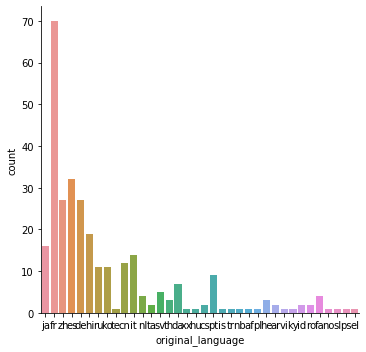

In [65]:
total_de_filmes_sem_ingles = tmdb.query("original_language!='en'")
# para plotar uma serie, temos que usar o catplot
#antes
sns.catplot(x="original_language", kind="count", data = total_de_filmes_sem_ingles)

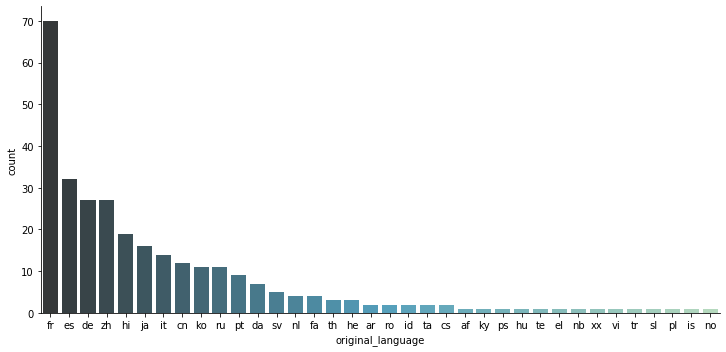

In [66]:
# depois - com refinamento
# o parametro aspect vai controlar a largura das barras (2 vezes)
# order irá ordernar pela sequencia de dados que foi informado
# palette são as cores a serem utilizadas
sns.catplot(x="original_language", kind="count", data = total_de_filmes_sem_ingles, 
            aspect=2, order=total_por_lingua_outros.index, palette="GnBu_d")

# Revisando média, mediana, desvio padrão, dispersão, boxplot, histogramas

In [67]:
filmes.head(2)

,filmeId,titulo,genero
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [68]:
notas_do_toy_story = notas.query("filmeId==1")
notas_do_jumanji = notas.query("filmeId==2")
print(len(notas_do_toy_story), len(notas_do_jumanji))

215 110


In [69]:
print("Nota Média do Toy Story: %.2f" % notas_do_toy_story.nota.mean())
print("Nota Média do Jumanji: %.2f" % notas_do_jumanji.nota.mean())

Nota Média do Toy Story: 3.92
Nota Média do Jumanji: 3.43


In [70]:
#mediana é a nota que mais se repete
print("Mediana do Toy Story: %.2f" % notas_do_toy_story.nota.median())
print("Mediana do Jumanji: %.2f" % notas_do_jumanji.nota.median())

Mediana do Toy Story: 4.00
Mediana do Jumanji: 3.50


In [71]:
#desvio padrão
print(notas_do_toy_story.nota.std(), notas_do_jumanji.nota.std())

0.8348591407114045 0.8817134921476455


In [72]:
import numpy as np
#criando valores
filme1 = np.append(np.array([2.5] * 10), np.array([3.5] * 10))
filme2 = np.append(np.array([5] * 10), np.array([1] * 10))
print(filme1.mean(), filme2.mean())
print(np.median(filme1), np.median(filme2))
print(np.std(filme1),np.std(filme2))

3.0 3.0
3.0 3.0
0.5 2.0


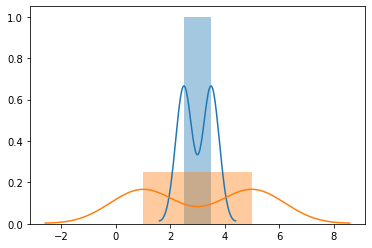

In [73]:
sns.distplot(filme1)
sns.distplot(filme2)

(array([10.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 10.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

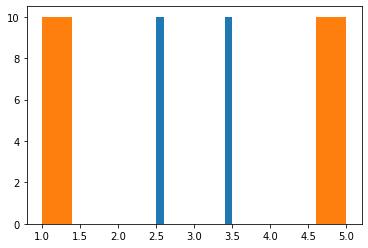

In [74]:
plt.hist(filme1)
plt.hist(filme2)

{'boxes': [<matplotlib.lines.Line2D at 0x7fc6802a7908>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc680236358>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc680236d30>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6802369e8>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc6802a7c88>,
  <matplotlib.lines.Line2D at 0x7fc680243748>]}

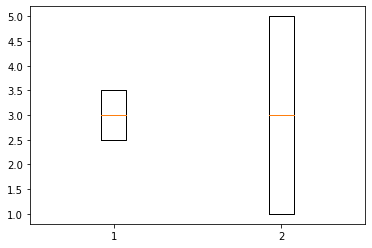

In [75]:
plt.boxplot([filme1, filme2])

{'boxes': [<matplotlib.lines.Line2D at 0x7fc6801af1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc6801afb38>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc6801b9550>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc6801b9208>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc68040a438>,
  <matplotlib.lines.Line2D at 0x7fc6801b9f28>]}

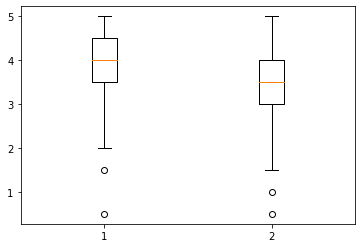

In [76]:
plt.boxplot([notas_do_toy_story.nota, notas_do_jumanji.nota])

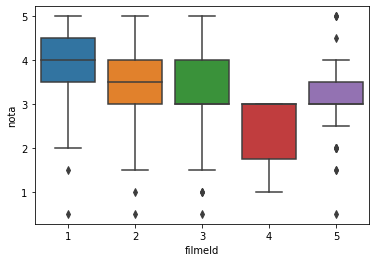

In [77]:
sns.boxplot(x="filmeId",y="nota", data = notas.query("filmeId in [1,2,3,4,5]"))